In [792]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from sklearn import preprocessing


In [793]:
plt.style.use('dark_background')

In [794]:
df = pd.read_csv('competitive_intelligence.csv')
df

,company,category,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth,page_views_visit,...,share_of_monthly_visits_c4,monthly_visits_growth_c4,sites_rank_in_country_c4,monthly_rank_growth_c4,country_5,share_of_monthly_visits_c5,monthly_visits_growth_c5,sites_rank_in_country_c5,monthly_rank_growth_c5,Unnamed: 44
0,orchestral tools,a,635.0,21.8,176.0,386422.00,-0.15,472.0,0.34,2.62,...,0.05,0.13,218033.0,-0.13,germany,0.04,2.81,287840.0,-0.41,NaN
1,native instruments,a,3236.0,890.0,895.0,224.88,-0.04,477.0,0.08,3.33,...,0.05,-0.22,12351.0,0.24,france,0.05,-0.06,9612.0,0.04,NaN
2,ableton,b,672.0,647.0,1376.0,28198.00,-0.01,445.0,0.04,3.04,...,0.05,-0.33,15788.0,0.43,france,0.04,0.17,15604.0,-0.15,NaN
3,waves,a,1830.0,540.0,986.0,49517.00,-0.06,442.0,-0.09,3.53,...,0.04,-0.39,37388.0,0.49,japan,0.03,1.12,47234.0,0.51,NaN
4,universal audio,a,3220.0,621.0,859.0,48743.00,-0.74,437.0,0.20,3.97,...,0.04,158.46,817.0,-0.98,canada,0.03,0.32,28430.0,-0.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [795]:
df.shape

(64, 45)

In [796]:
df=df[:21]

In [797]:
df=df.iloc[:,:44]

In [798]:
df.head()

,company,category,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth,page_views_visit,...,country_4,share_of_monthly_visits_c4,monthly_visits_growth_c4,sites_rank_in_country_c4,monthly_rank_growth_c4,country_5,share_of_monthly_visits_c5,monthly_visits_growth_c5,sites_rank_in_country_c5,monthly_rank_growth_c5
0,orchestral tools,a,635.0,21.8,176.0,386422.00,-0.15,472.0,0.34,2.62,...,japan,0.05,0.13,218033.0,-0.13,germany,0.04,2.81,287840.0,-0.41
1,native instruments,a,3236.0,890.0,895.0,224.88,-0.04,477.0,0.08,3.33,...,germany,0.05,-0.22,12351.0,0.24,france,0.05,-0.06,9612.0,0.04
2,ableton,b,672.0,647.0,1376.0,28198.00,-0.01,445.0,0.04,3.04,...,germany,0.05,-0.33,15788.0,0.43,france,0.04,0.17,15604.0,-0.15
3,waves,a,1830.0,540.0,986.0,49517.00,-0.06,442.0,-0.09,3.53,...,united kingdom,0.04,-0.39,37388.0,0.49,japan,0.03,1.12,47234.0,0.51
4,universal audio,a,3220.0,621.0,859.0,48743.00,-0.74,437.0,0.20,3.97,...,armenia,0.04,158.46,817.0,-0.98,canada,0.03,0.32,28430.0,-0.18


In [799]:
df.tail()

,company,category,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth,page_views_visit,...,country_4,share_of_monthly_visits_c4,monthly_visits_growth_c4,sites_rank_in_country_c4,monthly_rank_growth_c4,country_5,share_of_monthly_visits_c5,monthly_visits_growth_c5,sites_rank_in_country_c5,monthly_rank_growth_c5
16,soundcloud,c,3980.0,1000.0,1314.0,280.0,0.05,628.0,-0.02,3.17,...,brazil,0.04,0.09,423.0,0.00,france,0.03,-0.04,327.0,0.04
17,chillhop,b,1728.0,236.0,1044.0,264846.0,-0.60,542.0,0.46,2.55,...,germany,0.04,1.46,193531.0,-0.42,germany,0.04,1.46,193531.0,-0.42
18,musiversal,c,605.0,27.6,1320.0,308387.0,-0.28,517.0,1.38,2.96,...,canada,0.01,NaN,402188.0,NaN,germany,0.00,NaN,959705.0,NaN
19,bandcamp,c,4401.0,234.0,569.0,1204.0,0.07,492.0,-0.03,2.99,...,canada,0.04,0.09,672.0,-0.03,france,0.04,-0.15,860.0,0.19
20,spitfire audio,a,3337.0,147.0,1776.0,106177.0,0.19,413.0,0.05,4.27,...,australia,0.04,-0.02,32973.0,-0.64,france,0.03,-0.27,69624.0,0.27


In [800]:
df = pd.DataFrame(df)

In [801]:
df.select_dtypes('number').corr()
# df.corr()

,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth,page_views_visit,page_views_visit_growth,bounce_rate,...,sites_rank_in_country_c3,monthly_rank_growth_c3,share_of_monthly_visits_c4,monthly_visits_growth_c4,sites_rank_in_country_c4,monthly_rank_growth_c4,share_of_monthly_visits_c5,monthly_visits_growth_c5,sites_rank_in_country_c5,monthly_rank_growth_c5
posts,1.000000,-0.185540,0.197048,-0.311747,-0.132156,0.265539,-0.144269,0.283546,-0.060821,-0.015094,...,-0.362316,0.109639,-0.285781,0.153162,-0.318266,-0.123116,-0.200585,-0.125451,-0.336054,0.110207
followers,-0.185540,1.000000,-0.295302,0.910781,0.440637,-0.323105,0.265190,-0.356507,0.373649,0.673333,...,0.169759,-0.108367,0.859212,0.230835,0.758041,0.365251,0.855456,-0.096257,0.117640,-0.022788
following,0.197048,-0.295302,1.000000,-0.275403,-0.168388,0.171617,-0.102383,0.285634,-0.064023,-0.063907,...,-0.086651,0.229040,-0.039812,-0.126818,-0.178972,-0.071421,-0.189160,-0.119335,-0.082538,-0.011173
global_traffic_rank,-0.311747,0.910781,-0.275403,1.000000,0.428075,-0.494610,0.103421,-0.498095,0.129974,0.620368,...,0.382777,0.054710,0.815639,-0.020845,0.849964,-0.363526,0.757437,0.007247,0.264320,-0.114041
monthly_rank_growth,-0.132156,0.440637,-0.168388,0.428075,1.000000,-0.443631,-0.318904,-0.129775,-0.119077,0.141852,...,0.004694,-0.590482,0.346124,-0.305543,0.226835,0.188237,0.381232,-0.329381,-0.113967,0.259832
visit_duration,0.265539,-0.323105,0.171617,-0.494610,-0.443631,1.000000,0.543854,0.542486,0.458428,-0.009742,...,-0.281730,0.122465,-0.275104,-0.102533,-0.349649,-0.139017,-0.213475,0.077774,0.101920,0.078459
visit_duration_growth,-0.144269,0.265190,-0.102383,0.103421,-0.318904,0.543854,1.000000,0.201909,0.877937,0.216421,...,0.201346,0.141490,0.186253,0.060331,0.238368,-0.507759,0.187881,0.378849,0.497573,-0.387718
page_views_visit,0.283546,-0.356507,0.285634,-0.498095,-0.129775,0.542486,0.201909,1.000000,0.418479,-0.431059,...,-0.327129,-0.358537,-0.317641,0.418440,-0.576522,-0.235607,-0.296062,-0.276748,-0.087425,0.318279
page_views_visit_growth,-0.060821,0.373649,-0.064023,0.129974,-0.119077,0.458428,0.877937,0.418479,1.000000,0.210616,...,0.114651,-0.170768,0.231919,0.468831,0.203757,-0.359324,0.241446,-0.177810,0.352106,0.145985
bounce_rate,-0.015094,0.673333,-0.063907,0.620368,0.141852,-0.009742,0.216421,-0.431059,0.210616,1.000000,...,0.112072,0.020497,0.631042,-0.033709,0.737693,0.046676,0.628972,0.451718,0.199558,-0.406186


<Axes: >

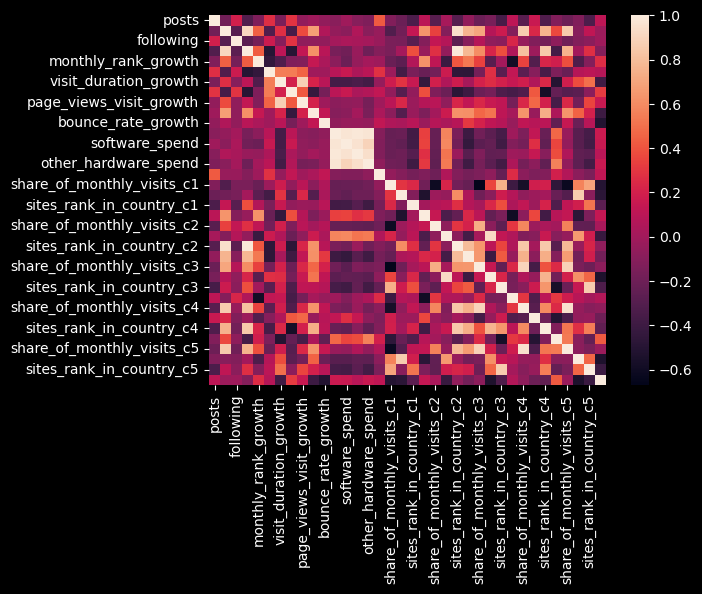

In [802]:
sns.heatmap(df.select_dtypes('number').corr())


In [803]:
# sns.pairplot(df)

In [804]:
df_a=df[df['category']=="a"]

In [805]:
df_a.select_dtypes('number').corr()

,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth,page_views_visit,page_views_visit_growth,bounce_rate,...,sites_rank_in_country_c3,monthly_rank_growth_c3,share_of_monthly_visits_c4,monthly_visits_growth_c4,sites_rank_in_country_c4,monthly_rank_growth_c4,share_of_monthly_visits_c5,monthly_visits_growth_c5,sites_rank_in_country_c5,monthly_rank_growth_c5
posts,1.000000,-0.109896,0.771526,-0.676252,-0.203934,0.018484,-0.184667,0.532239,-0.000894,-0.240599,...,-0.574518,0.821096,-0.309342,0.404010,-0.537712,-0.457780,-0.245143,-0.445523,-0.780209,0.301522
followers,-0.109896,1.000000,-0.443290,0.569430,-0.226669,0.912224,0.962456,0.493552,0.972827,0.394471,...,-0.217152,-0.267032,0.938777,0.286122,0.492882,0.236318,0.883520,-0.331515,0.403889,0.293714
following,0.771526,-0.443290,1.000000,-0.721336,0.262269,-0.356614,-0.491677,0.354177,-0.304766,-0.578373,...,-0.371658,0.781753,-0.571538,-0.073713,-0.653070,-0.248325,-0.502129,-0.575975,-0.788360,0.685695
global_traffic_rank,-0.676252,0.569430,-0.721336,1.000000,0.086550,0.331378,0.602586,0.151236,0.469402,0.029353,...,0.657382,-0.438135,0.612812,-0.206817,0.469280,-0.090221,0.486514,0.022357,0.942440,-0.331516
monthly_rank_growth,-0.203934,-0.226669,0.262269,0.086550,1.000000,-0.264151,-0.220023,-0.178910,-0.251420,-0.413768,...,0.248860,0.275274,-0.100416,-0.933784,-0.026257,0.514116,-0.046957,-0.169910,0.116538,0.433410
visit_duration,0.018484,0.912224,-0.356614,0.331378,-0.264151,1.000000,0.942087,0.431495,0.940780,0.630068,...,-0.467134,-0.197171,0.891697,0.017477,0.659344,0.147056,0.825986,0.405747,0.265718,-0.015477
visit_duration_growth,-0.184667,0.962456,-0.491677,0.602586,-0.220023,0.942087,1.000000,0.462709,0.966848,0.500394,...,-0.185668,-0.306340,0.955388,0.346247,0.677571,-0.472041,0.859083,0.525366,0.510960,-0.372729
page_views_visit,0.532239,0.493552,0.354177,0.151236,-0.178910,0.431495,0.462709,1.000000,0.606708,-0.323358,...,-0.128464,0.476360,0.244227,0.417934,-0.142307,-0.561748,0.128882,-0.523954,-0.045706,0.428410
page_views_visit_growth,-0.000894,0.972827,-0.304766,0.469402,-0.251420,0.940780,0.966848,0.606708,1.000000,0.386359,...,-0.314278,-0.189204,0.896014,0.557733,0.505871,-0.360000,0.814749,-0.174310,0.319753,0.415310
bounce_rate,-0.240599,0.394471,-0.578373,0.029353,-0.413768,0.630068,0.500394,-0.323358,0.386359,1.000000,...,-0.463946,-0.530606,0.551263,0.001194,0.776105,0.180458,0.541531,0.779469,0.180306,-0.550479


<Axes: >

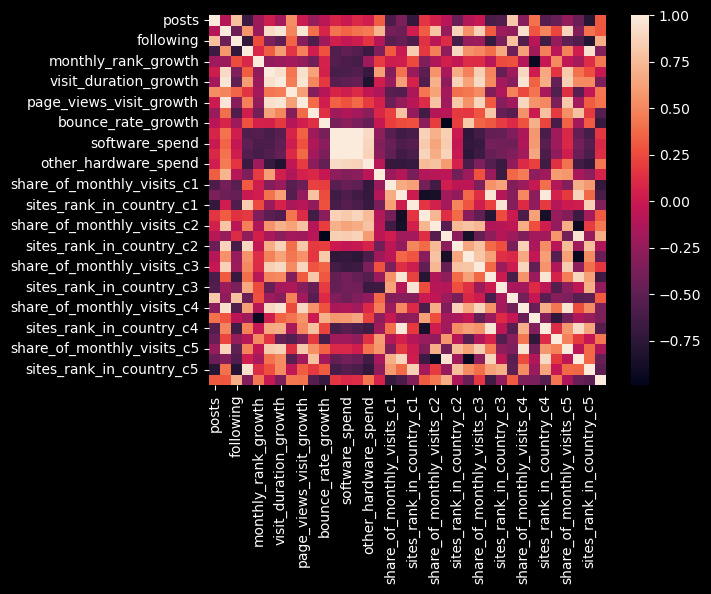

In [806]:
sns.heatmap(df_a.select_dtypes('number').corr())

In [807]:
df.to_csv('compintel_res.csv')

In [808]:
df_comp = pd.read_csv('spt_aud_comp.csv')

In [809]:
df_comp = pd.DataFrame(df_comp)
df_comp


,company,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth
0,Spitfire Audio,3337,147.00,1776.0,106177.000,19.0,413.00,5.0
1,Average of Other Companies,1413,952.31,745.5,564986.544,-5.9,434.45,31.7


In [810]:

df_social_media_presence_index = ['company','posts', 'followers', 'following']
df_social_media_presence = df_comp[df_social_media_presence_index]
# df_social_media_presence.set_index('company', inplace=True)
df_social_media_presence

,company,posts,followers,following
0,Spitfire Audio,3337,147.00,1776.0
1,Average of Other Companies,1413,952.31,745.5


<Axes: >

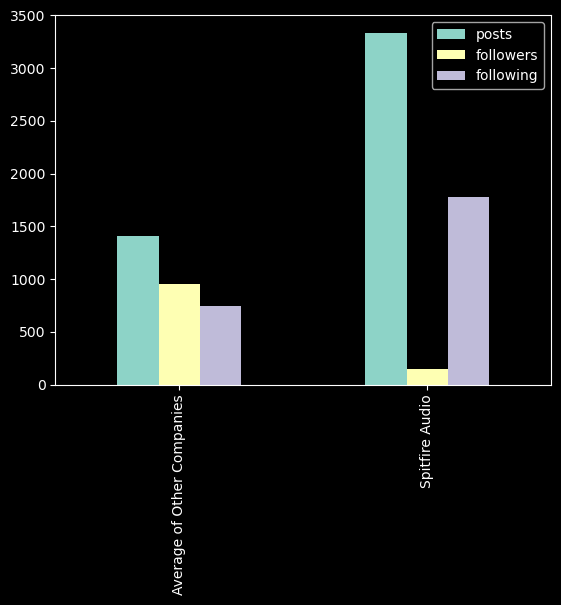

In [821]:
df_social_media_presence.groupby('company').sum().plot(kind='bar', xlabel='')


In [812]:
df_spit=df_comp['Spitfire Audio']
df_avg=df_comp['Average of Other Companies']
df_index=df_comp['Metric']

KeyError: 'Spitfire Audio'

In [ ]:
spit = list(df_spit)
avg_c = list(df_avg)


In [ ]:
df = pd.DataFrame({'spit': spit,
                   'avg_c': avg_c}, index=df_index)

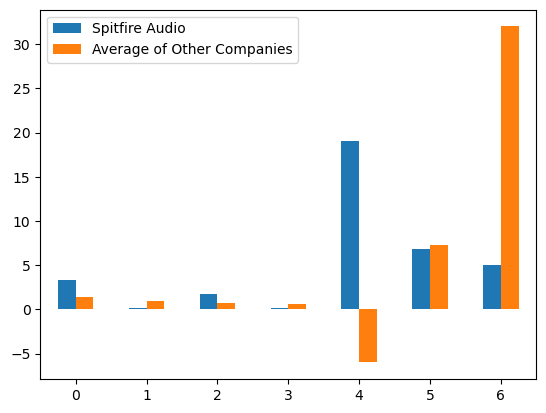

In [ ]:
ax = df_comp.plot.bar(rot=0)

<Axes: >

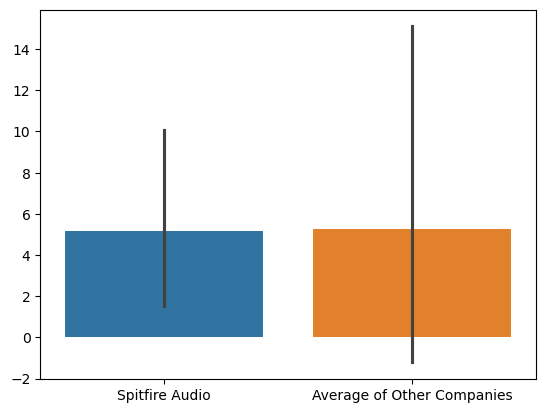

In [ ]:
sns.barplot(df_comp)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df_comp)

ValueError: could not convert string to float: 'posts (k)'

In [ ]:
df_comp

Metric,posts,followers,following,global_traffic_rank,monthly_rank_growth,visit_duration,visit_duration_growth
Spitfire Audio,3337.0,147.00,1776.0,106177.000,19.0,413.00,5.0
Average of Other Companies,1413.0,952.31,745.5,564986.544,-5.9,434.45,31.7


<Axes: xlabel='Metric'>

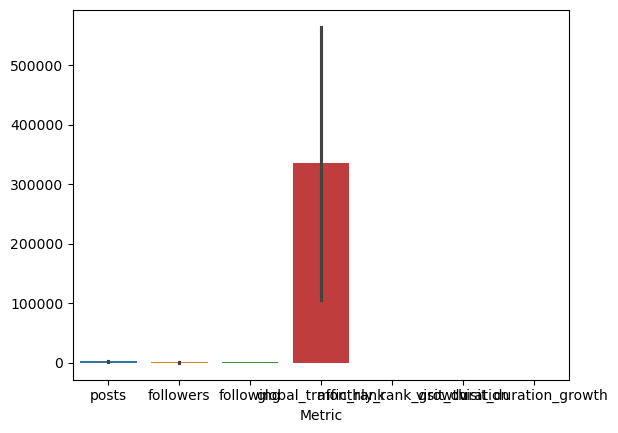

In [ ]:
sns.barplot(df_comp)

In [822]:
DF

NameError: name 'DF' is not defined

In [825]:
df.describe(include='O')

,company,category,service_spend,country_1,country_2,country_3,country_4,country_5
count,21,21,12,21,21,21,21,21
unique,21,3,11,6,9,11,14,10
top,orchestral tools,b,1.10,united states,united kingdom,germany,germany,france
freq,1,9,2,16,6,4,5,7
